An autoencoder is a type of artificial neural network used to learn efficient data codings in an unsupervised manner. The aim of an autoencoder is to learn a representation (encoding) for a set of data, typically for dimensionality reduction, by training the network to ignore signal “noise”.

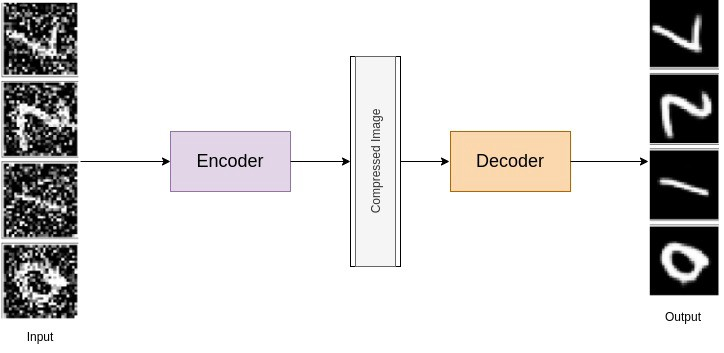

In [105]:
import warnings
warnings.filterwarnings("ignore")

In [106]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow.keras.datasets import mnist

from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.layers import Dense, Input, Conv2D, MaxPool2D, UpSampling2D  #Maxpool layer is like down sampling 
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [107]:
IMAGE_SIZE = 28

In [108]:
# load data set 
(X_train, _), (X_test, _) = mnist.load_data()

X_train.shape , X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [109]:
X_train = X_train.astype('float32')/255.
X_test = X_test.astype('float32')/255.

In [110]:
def show_img(img):
  plt.figure(figsize= (10,10))
  for i in range(10):
    plt.subplot(2,5,i+1)
    plt.axis('off')
    plt.imshow(img[i], cmap = 'binary')
  plt.show()

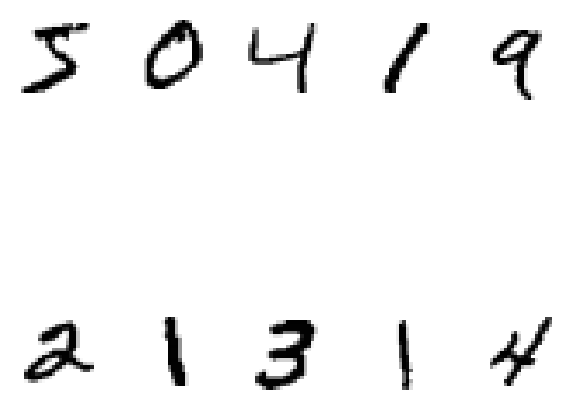

In [111]:
show_img(X_train)

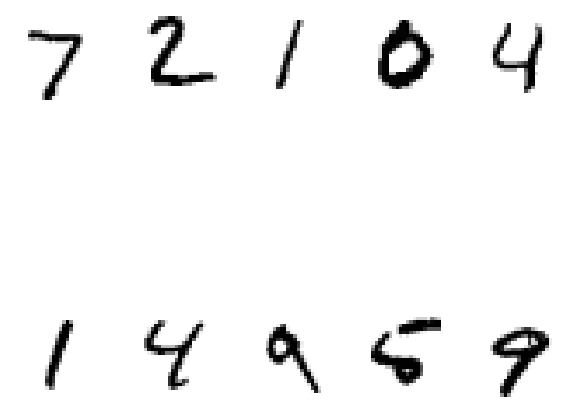

In [112]:
show_img(X_test)

In [113]:
# now we expand the dimention 

X_train = np.expand_dims(X_train, axis= len(X_train.shape))
X_test = np.expand_dims(X_test, axis= len(X_test.shape))

X_train.shape , X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [114]:
# Adding Artificial Noise 
noise_factor = 0.5 

X_train_noisy = X_train + noise_factor *  np.random.normal(loc= 0.0 , scale= 1.0, size = X_train.shape)
X_test_noisy = X_test + noise_factor *  np.random.normal(loc= 0.0 , scale= 1.0, size = X_test.shape)

In [115]:
# to normalize we will clip our data 

X_train_noisy = np.clip(X_train_noisy, 0., 1.)

X_test_noisy = np.clip(X_test_noisy, 0. , 1. )

In [116]:
X_train_noisy.shape , X_test_noisy.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

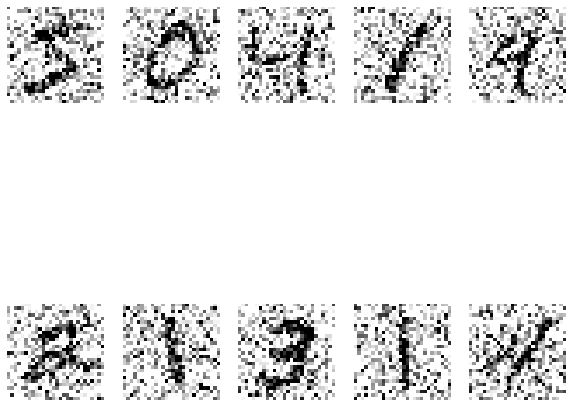

In [117]:
show_img(np.squeeze(X_train_noisy, axis=3))

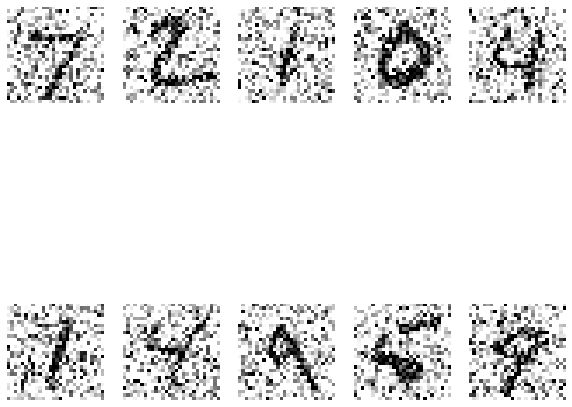

In [118]:
show_img(np.squeeze(X_test_noisy, axis=3))

In [119]:
## Creating our Autoencoder model 

model = Sequential()
model.add(Input(shape=(IMAGE_SIZE, IMAGE_SIZE,1)))
# Encoding Process
model.add(Conv2D(filters= 32, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPool2D(pool_size=(2,2), padding= 'same'))
model.add(Conv2D(filters= 8, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPool2D(pool_size=(2,2), padding= 'same'))
model.add(Conv2D(filters= 8, kernel_size= (3,3), activation= 'relu', padding= 'same'))

model.add(MaxPool2D(pool_size=(2,2), padding= 'same')) 

# Decoding Process
model.add(Conv2D(filters= 8, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(UpSampling2D(size= (2,2)))
model.add(Conv2D(filters= 8, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(UpSampling2D(size= (2,2)))
model.add(Conv2D(filters= 32, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(Conv2D(filters= 32, kernel_size= (3,3), activation= 'relu'))
model.add(UpSampling2D(size= (2,2)))
model.add(Conv2D(filters= 1, kernel_size= (3,3), activation= 'relu', padding= 'same')) # the ouput image is 256,256,3

model.compile(optimizer='adam', loss= "mean_squared_error", metrics=['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 8)         2312      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 8)           0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 4, 4, 8)          

In [120]:
mc = ModelCheckpoint("bestmodel.h5", monitor= "val_acc", verbose= 1, save_best_only= True)
es = EarlyStopping(monitor= "val_acc", min_delta=0.01, patience=2, verbose=1)

In [121]:
model.fit(X_train_noisy, X_train, batch_size= 250, epochs= 10, validation_data= (X_test_noisy, X_test), callbacks= [mc] )

Epoch 1/10
240/240 [==============================] - 3s 12ms/step - loss: 0.0625 - acc: 0.8000 - val_loss: 0.0365 - val_acc: 0.7989

Epoch 00001: val_acc improved from -inf to 0.79888, saving model to bestmodel.h5
Epoch 2/10
240/240 [==============================] - 3s 11ms/step - loss: 0.0342 - acc: 0.8029 - val_loss: 0.0288 - val_acc: 0.8036

Epoch 00002: val_acc improved from 0.79888 to 0.80363, saving model to bestmodel.h5
Epoch 3/10
240/240 [==============================] - 3s 11ms/step - loss: 0.0286 - acc: 0.8055 - val_loss: 0.0261 - val_acc: 0.8071

Epoch 00003: val_acc improved from 0.80363 to 0.80714, saving model to bestmodel.h5
Epoch 4/10
240/240 [==============================] - 3s 11ms/step - loss: 0.0259 - acc: 0.8069 - val_loss: 0.0241 - val_acc: 0.8065

Epoch 00004: val_acc did not improve from 0.80714
Epoch 5/10
240/240 [==============================] - 3s 11ms/step - loss: 0.0242 - acc: 0.8075 - val_loss: 0.0228 - val_acc: 0.8068

Epoch 00005: val_acc did not im

In [122]:
model = load_model("bestmodel.h5")

In [123]:
model.evaluate(X_test_noisy, X_test)[1]*100

313/313 [==============================] - 1s 2ms/step - loss: 0.0199 - acc: 0.8093


80.92772960662842

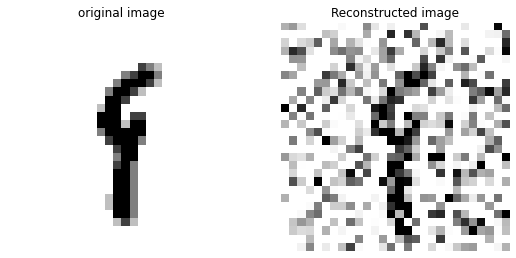

In [124]:
i = np.random.randint(0 , X_test_noisy.shape[0])

pred = model.predict( np.expand_dims( X_test_noisy[i]    , axis = 0    ))

pred = np.squeeze(X_test_noisy , axis= 3)[i]

img = np.squeeze(X_test , axis= 3)[i]


# ploting the images

plt.figure(figsize= (9,9))

plt.subplot(1,2,1)
plt.axis('off')
plt.title("original image")
plt.imshow(img, cmap = 'binary')

plt.subplot(1,2,2)
plt.axis('off')
plt.title("Reconstructed image")
plt.imshow(pred, cmap = 'binary')

plt.show()